## Chapter3.2 Cloud Vision API

[API Key](https://console.cloud.google.com/apis/credentials)を入力してEnter

In [1]:
import getpass
APIKEY = getpass.getpass()

··········


In [0]:
# 検知に使う画像ファイルをGitHubからダウンロードしておく
!wget https://github.com/hayatoy/gcpml-book/raw/master/Part1/face.jpg
!wget https://github.com/hayatoy/gcpml-book/raw/master/Part1/seagull.jpg
!wget https://github.com/hayatoy/gcpml-book/raw/master/Part1/sydney.jpg
!wget https://github.com/hayatoy/gcpml-book/raw/master/Part1/text.jpg

In [0]:
# クライアントライブラリのロードとインスタンスの作成
from googleapiclient.discovery import build
vision_service = build('vision', 'v1', developerKey=APIKEY)

In [0]:
# リクエストパラメータを作成
# ここでは画像ファイルからrawデータを読み込む

from base64 import b64encode
with open('seagull.jpg', 'rb') as image_file:
  image_raw = {
      'content': b64encode(image_file.read()).decode('utf-8')
  }
request={
    'requests': [
        {'image': image_raw,
         'features': {'type':'LABEL_DETECTION', 'model':'builtin/stable'}}
    ]
}

#### ラベル検出
<img src='https://github.com/hayatoy/gcpml-book/blob/master/Part1/seagull.jpg?raw=1' style='width:400px;margin-left:0px;'/>

In [5]:
# ラベル検出を実行
response = vision_service.images().annotate(body=request).execute()
labels = response['responses'][0]['labelAnnotations']

print('Labels:')
for label in labels:
    print('Score:%f, Label:%s' % (label['score'], label['description']))

Labels:
Score:0.971422, Label:Bird
Score:0.951258, Label:Water
Score:0.949569, Label:European herring gull
Score:0.946716, Label:Western Gull
Score:0.915140, Label:Gull
Score:0.904901, Label:Beak
Score:0.902293, Label:Seabird
Score:0.760697, Label:Vacation
Score:0.751879, Label:Charadriiformes
Score:0.682854, Label:Great black-backed gull


#### 顔検知
<img src='https://github.com/hayatoy/gcpml-book/blob/master/Part1/face.jpg?raw=1' style='width:400px;margin-left:0px;'/>

In [6]:
# 顔検知用の画像読み込み＆リクエストパラメータ作成
with open('face.jpg', 'rb') as image_file:
  image_raw = {
      'content': b64encode(image_file.read()).decode('utf-8')
  }
request={
    'requests': [
        {'image': image_raw,
         'features': {'type':'FACE_DETECTION', 'model':'builtin/stable'}}
    ]
}

# 顔検知を実行
response = vision_service.images().annotate(body=request).execute()
faces = response['responses'][0]['faceAnnotations']

# 感情の推定結果をprint
for face in faces:
    print(face['joyLikelihood'])
    print(face['angerLikelihood'])
    print(face['sorrowLikelihood'])
    print(face['surpriseLikelihood'])

VERY_LIKELY
VERY_UNLIKELY
VERY_UNLIKELY
VERY_UNLIKELY
VERY_LIKELY
VERY_UNLIKELY
VERY_UNLIKELY
VERY_UNLIKELY
VERY_LIKELY
VERY_UNLIKELY
VERY_UNLIKELY
VERY_UNLIKELY
VERY_LIKELY
VERY_UNLIKELY
VERY_UNLIKELY
VERY_UNLIKELY
POSSIBLE
VERY_UNLIKELY
VERY_UNLIKELY
VERY_UNLIKELY


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

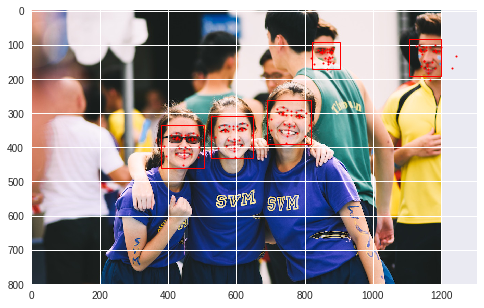

In [8]:
# 画像をmatplotlibで描画
plt.figure(figsize=(8, 6))
im = Image.open('face.jpg', 'r')
plt.imshow(np.asarray(im))

# 各顔検知結果ごとにプロット
for face in faces:
    # 顔の輪郭を矩形でプロット
    bbox_x = [v['x'] for v in face['fdBoundingPoly']['vertices']]
    bbox_y = [v['y'] for v in face['fdBoundingPoly']['vertices']]
    bbox_x.append(bbox_x[0])
    bbox_y.append(bbox_y[0])
    plt.plot(bbox_x, bbox_y, 'r-', linewidth=1)

    # 顔の各パーツ（目や耳）の位置をプロット
    landmarks_x = []
    landmarks_y = []
    for landmark in face['landmarks']:
        landmarks_x.append(landmark['position']['x'])
        landmarks_y.append(landmark['position']['y'])
    plt.plot(landmarks_x, landmarks_y, 'ro', markersize=2)

#### ランドマーク検出
<img src='https://github.com/hayatoy/gcpml-book/blob/master/Part1/sydney.jpg?raw=1' style='width:400px;margin-left:0px;'/>

In [9]:
# ランドマーク検知用の画像読み込み＆リクエストパラメータ作成
with open('sydney.jpg', 'rb') as image_file:
  image_raw = {
      'content': b64encode(image_file.read()).decode('utf-8')
  }
request={
    'requests': [
        {'image': image_raw,
         'features': {'type':'LANDMARK_DETECTION', 'model':'builtin/stable'}}
    ]
}

# ランドマークを抽出
response = vision_service.images().annotate(body=request).execute()
landmarks = response['responses'][0]['landmarkAnnotations']

for landmark in landmarks:
    print(landmark['description'])
    print(landmark['locations'][0]['latLng']['latitude'],
          landmark['locations'][0]['latLng']['longitude'])


Sydney
(-33.857765, 151.21450099999998)
Sydney Opera House
(-33.857123, 151.213921)
Sydney Harbour Bridge
(-33.856446, 151.211185)


In [10]:
landmark

{u'boundingPoly': {u'vertices': [{u'x': 406, u'y': 232},
   {u'x': 602, u'y': 232},
   {u'x': 602, u'y': 327},
   {u'x': 406, u'y': 327}]},
 u'description': u'Sydney Harbour Bridge',
 u'locations': [{u'latLng': {u'latitude': -33.856446,
    u'longitude': 151.211185}}],
 u'mid': u'/m/0701q',
 u'score': 0.37074065}

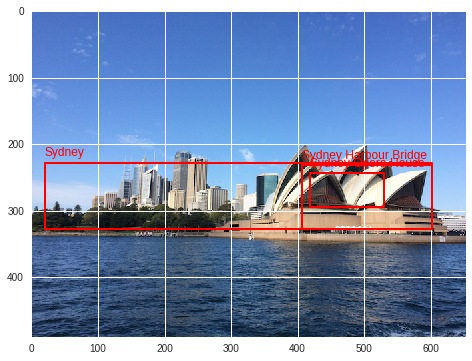

In [11]:
# 画像をロードしMatplotlibで描画する
im = Image.open('sydney.jpg', 'r')
plt.figure(figsize=(8, 6))
plt.imshow(np.asarray(im))

for landmark in landmarks:
    # 各ランドマークの矩形領域を取得する
    bbox_x = [v['x'] for v in landmark['boundingPoly']['vertices']]
    bbox_y = [v['y'] for v in landmark['boundingPoly']['vertices']]
    bbox_x.append(bbox_x[0])
    bbox_y.append(bbox_y[0])
    # 矩形をプロットする
    plt.plot(bbox_x, bbox_y, 'r-', linewidth=2)
    plt.text(bbox_x[0], bbox_y[0] - 10, landmark['description'], color='r')

#### OCR
<img src='https://github.com/hayatoy/gcpml-book/blob/master/Part1/text.jpg?raw=1' style='width:400px;margin-left:0px;'/>

In [12]:
# OCR検知用の画像読み込み＆リクエストパラメータ作成
with open('text.jpg', 'rb') as image_file:
  image_raw = {
      'content': b64encode(image_file.read()).decode('utf-8')
  }
request={
    'requests': [
        {'image': image_raw,
         'features': {'type':'TEXT_DETECTION', 'model':'builtin/stable'}}
    ]
}

# OCRを実行
response = vision_service.images().annotate(body=request).execute()
texts = response['responses'][0]['fullTextAnnotation']

# 読み取ったテキストをprint
print(texts['text'])
    

YCAT
横浜シティ·エア·ターミナル
(空港行きバス·高速バス)
Airport Bus-Expressway Bus /공항버스 고속버스
機場巴士·高速巴士/机场大巴,高速巴士



In [13]:
texts['pages'][0]['blocks'][1]['paragraphs'][0]['words'][0]

{u'boundingBox': {u'vertices': [{u'x': 486, u'y': 518},
   {u'x': 671, u'y': 512},
   {u'x': 674, u'y': 600},
   {u'x': 489, u'y': 606}]},
 u'property': {u'detectedLanguages': [{u'languageCode': u'ja'}]},
 u'symbols': [{u'boundingBox': {u'vertices': [{u'x': 486, u'y': 518},
     {u'x': 574, u'y': 515},
     {u'x': 577, u'y': 603},
     {u'x': 489, u'y': 606}]},
   u'property': {u'detectedLanguages': [{u'languageCode': u'ja'}]},
   u'text': u'\u6a2a'},
  {u'boundingBox': {u'vertices': [{u'x': 583, u'y': 515},
     {u'x': 671, u'y': 512},
     {u'x': 674, u'y': 600},
     {u'x': 586, u'y': 603}]},
   u'property': {u'detectedLanguages': [{u'languageCode': u'ja'}]},
   u'text': u'\u6d5c'}]}

In [0]:
# 日本語フォントをGitHubからダウンロード
!wget https://github.com/hayatoy/gcpml-book/raw/master/Part1/NotoSansMonoCJKjp-Regular.otf

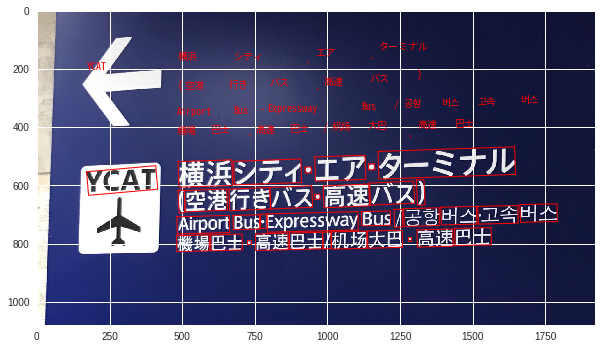

In [15]:
# 日本語フォントを読み込む
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'NotoSansMonoCJKjp-Regular.otf', size=10)

# 画像をロードしMatplotlibで描画する
im = Image.open('text.jpg', 'r')
plt.figure(figsize=(10, 6))
plt.imshow(np.asarray(im))

for block in texts['pages'][0]['blocks']:  # ブロック単位の検知エリア
    for paragraph in block['paragraphs']:  # パラグラフ単位の検知エリア
        for word in paragraph['words']:    # 単語単位の検知エリア
            # 各テキストの矩形領域を取得する
            bbox_x = [v['x'] for v in word['boundingBox']['vertices']]
            bbox_y = [v['y'] for v in word['boundingBox']['vertices']]
            bbox_x.append(bbox_x[0])
            bbox_y.append(bbox_y[0])
            
            # 矩形をプロットする
            plt.plot(bbox_x, bbox_y, 'r-', linewidth=1)
            
            # 文字を連結する
            t = "".join([s['text'] for s in word['symbols']])
            
            # 文字を少し上にずらしてプロットする
            plt.text(bbox_x[0], bbox_y[0]-350, t,
                     color='r', fontproperties=fp)